In [3]:
import json
# import pandas as pd
import numpy as np

In [268]:
REVIEW_PATH = "../data/yelp_academic_dataset_review.json"

def read_data(limit: int) -> np.ndarray:
    lengths = []
    with open(REVIEW_PATH) as f:
        for idx, line in enumerate(f):
            if idx >= limit:
                break
            lengths.append(len(json.loads(line)["text"]))

    # lengths = np.array([[l] for l in lengths])
    lengths = np.array(lengths)
    return lengths

lengths = read_data(1000)

# Agglomerative Hierarchical Clustering


Basic algorithm
```
	Compute the proximity matrix
	Let each data point be a cluster
	Repeat
		Calculate distance between clusters
		Merge the two closest clusters
	Until only a single cluster remains
```

In [182]:
# def calculate_distance(cluster1, cluster2, prox_func: str):
#     prox_funcs = {
#         "min": np.min,
#         "max": np.max,
#     }
#     distances = []
#     for i in range(len(cluster1)):
#         for j in range(len(cluster2)):
#             distances.append(np.abs(cluster1[i] - cluster2[j]))

#     return prox_funcs[prox_func](distances)

def calculate_distance(x, y):
    return abs(x - y)

def calculate_proxmity_matrix(array):

    matrix = np.zeros((len(array), len(array)))
    for i in range(len(array)):
        for j in range(len(array)):
            distance = calculate_distance(array[i][0], array[j][0])
            if i == j:
                matrix[i][j] = np.nan
            else:
                matrix[i][j] = distance
                    
    return matrix

# print(prox_matrix.shape)

(10, 10)


In [269]:
def hierarchical_clustering(arr: np.ndarray, prox_func: str = "min", n_clusters: int = 3):
    """
    algorithm:
    create a numpy array with shape = (len(arr), len(arr)), 
    with the first element of each row being the element of arr, and the other elements being np.nan
    find the min distance in the prox matrix, and find the corresponding pair of clusters
    merge the two clusters by replacing np.nan of the first cluster with the other cluster
    delete clusters with only nan
    update the prox matrix by:
        - merging rows of the 2 clusters into the first clusters by taking the minimum distance, element wise
        - delete the row and column of the second cluster
    """

    prox_funcs = {
        "min": np.minimum,
        "max": np.maximum,
    }

    # prox_matrix = calculate_proxmity_matrix(arr)
    prox_matrix = np.abs(arr[:, np.newaxis] - arr)
    prox_matrix = prox_matrix.astype('float')
    prox_matrix[prox_matrix == 0.] = np.nan

    n = len(arr)
    new_arr = np.zeros((n, n))
    for i in range(len(arr)):
        new_arr[i][0] = arr[i]
        new_arr[i][1:] = np.nan

    # print(new_arr.shape)

    # print(len(new_arr))
    while len(new_arr) > n_clusters:
        # print(len(new_arr))
        min_dist = np.nanmin(prox_matrix)
        # print(min_dist)
        min_dist_idx = np.argwhere(prox_matrix == min_dist)[0]
        # print(min_dist_idx)
        # min_dist_idx = (min_dist_idx[0][0], min_dist_idx[1][0])

        # print(min_dist_idx)

        # cluster1 = new_arr[min_dist_idx[0]]
        # cluster2 = new_arr[min_dist_idx[1]]
        # print(prox_matrix)
        # print(new_arr)
        next_nonzero_idx = np.count_nonzero(~np.isnan(new_arr[min_dist_idx[0]]))
        # print(next_nonzero_idx)
        new_arr[min_dist_idx[0]][next_nonzero_idx:] = new_arr[min_dist_idx[1]][:-next_nonzero_idx]

        # delete cluster2

        new_arr = np.delete(new_arr, min_dist_idx[1], axis=0)

        # update prox matrix
        prox_matrix[min_dist_idx[0]] = prox_funcs[prox_func](prox_matrix[min_dist_idx[0]], prox_matrix[min_dist_idx[1]])
        prox_matrix = np.delete(prox_matrix, min_dist_idx[1], axis=0)
        prox_matrix = np.delete(prox_matrix, min_dist_idx[1], axis=1)

    return new_arr

In [275]:
import time

start = time.time()
result = hierarchical_clustering(lengths, "max", 3)
end = time.time()

print(end - start)

2.1924805641174316


In [276]:
for cluster in result:
    print(np.count_nonzero(~np.isnan(cluster)))

4
586
410


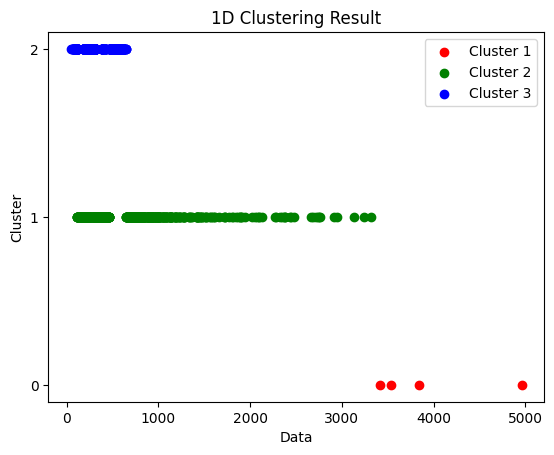

In [277]:
import matplotlib.pyplot as plt

colors = ['red', 'green', 'blue']

# Plot the clusters
for i, cluster in enumerate(result):
    plt.scatter(cluster, [i] * len(cluster), c=colors[i], label=f'Cluster {i+1}')

# Customize the plot
plt.xlabel('Data')
plt.ylabel('Cluster')
plt.legend()
plt.title('1D Clustering Result')
plt.yticks([0,1,2])

# Display the plot
plt.show()
